# Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from pylab import *
%matplotlib inline
importstatsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import skimpy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Read In and View Data

In [3]:
dementia = pd.read_csv('C:/Users/Evelyn/Desktop/alzheimers_features2.csv')

In [4]:
dementia.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Demented,M,79,20,1.0,25.0,2.0,1710,0.760,1.026
1,Demented,F,98,17,1.0,21.0,2.0,1503,0.660,1.168
2,Demented,F,78,14,3.0,15.0,2.0,1401,0.700,1.253
3,Demented,M,77,20,1.0,23.0,1.0,1713,0.756,1.024
4,Demented,M,61,18,1.0,30.0,1.0,1957,0.734,0.897


## Data Overview

In [5]:
skimpy.skim(dementia)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 373    │ │ float64     │ 5     │                                    │
│ │ Number of columns │ 10     │ │ int64       │ 3     │                                    │
│ └───────────────────┴────────┘ │ object      │ 2     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃      ┃ missin ┃ comple ┃ mean   ┃ sd    ┃ p0     ┃ p25    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┃      ┃ g      ┃ te     ┃        ┃       ┃        ┃        ┃        ┃        ┃        ┃  │
│ ┃      ┃        ┃ rate   ┃        ┃       ┃        ┃        ┃        ┃        ┃        ┃  │
│ ┡━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Age  │ 0.0    │ 1.0    │ 77.0   │ 7.6   │ 60.0   │ 71.0   │ 82.0   │ 98.0   │ ▂▅█▇▃▁ │  │
│ │ EDUC │ 0.0    │ 1.0    │ 15.0   │ 2.9   │ 6.0    │ 12.0   │ 16.0   │ 23.0   │ ▁▁█▅▄  │  │
│ │ SES  │ 19.0   │ 0.95   │ 2.5    │ 1.1   │ 1.0    │ 2.0    │ 3.0    │ 5.0    │ ▇█ ▆▆▁ │  │
│ │ MMSE │ 2.0    │ 0.99   │ 27.0   │ 3.7   │ 4.0    │ 27.0   │ 30.0   │ 30.0   │    ▁▁█ │  │
│ │ CDR  │ 0.0    │ 1.0    │ 0.29   │ 0.37  │ 0.0    │ 0.0    │ 0.5    │ 2.0    │ █▅ ▂   │  │
│ │ eTIV │ 0.0    │ 1.0    │ 1500.0 │ 180.0 │ 1100.0 │ 1400.0 │ 1600.0 │ 2000.0 │ ▁▆█▄▂▁ │  │
│ │ nWBV │ 0.0    │ 1.0    │ 0.73   │ 0.037 │ 0.64   │ 0.7    │ 0.76   │ 0.84   │ ▂▆█▆▂▁ │  │
│ │ ASF  │ 0.0    │ 1.0    │ 1.2    │ 0.14  │ 0.88   │ 1.1    │ 1.3    │ 1.6    │ ▂▄█▆▂▁ │  │
│ └──────┴────────┴────────┴────────┴───────┴────────┴────────┴────────┴────────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

## Goal: Predict Dementia Status by all other variables

## Data Wrangling

### Deal with Missing Data

In [6]:
dementia.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [7]:
#fill missing data with the mean value of column descriptor

dementia['SES'] = dementia['SES'].fillna(dementia['SES'].mean())

In [8]:
dementia['MMSE'] = dementia['MMSE'].fillna(dementia['MMSE'].mean())

In [9]:
dementia.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

### Rename Columns 

In [10]:
dementia.rename(columns = {'Group' : 'Status','M/F' : 'Gender'}, inplace = True)

In [11]:
dementia.head()

,Status,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Demented,M,79,20,1.0,25.0,2.0,1710,0.760,1.026
1,Demented,F,98,17,1.0,21.0,2.0,1503,0.660,1.168
2,Demented,F,78,14,3.0,15.0,2.0,1401,0.700,1.253
3,Demented,M,77,20,1.0,23.0,1.0,1713,0.756,1.024
4,Demented,M,61,18,1.0,30.0,1.0,1957,0.734,0.897


## Replace Converted Status with Demented Status

In [12]:
list(dementia["Status"].unique())

['Demented', 'Converted', 'Nondemented']

In [13]:
dementia["Status"] = dementia["Status"].replace( list(dementia["Status"].unique()), ['Demented', 'Demented', 'Nondemented'])

In [14]:
list(dementia["Status"].unique())

['Demented', 'Nondemented']

### Recode Gender

In [15]:
dict = {"Gender": {"M": 0, "F": 1}}
dementia.replace(dict, inplace=True)
dict = {"Status": {"Nondemented": 0, "Demented": 1,}}
dementia.replace(dict, inplace=True)

In [139]:
dementia.head()

,Status,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSESQ,MMSECUBE
0,1,0,79,20,1.0,25.0,2.0,1710,0.760,1.026,625.0,15625.0
1,1,1,98,17,1.0,21.0,2.0,1503,0.660,1.168,441.0,9261.0
2,1,1,78,14,3.0,15.0,2.0,1401,0.700,1.253,225.0,3375.0
3,1,0,77,20,1.0,23.0,1.0,1713,0.756,1.024,529.0,12167.0
4,1,0,61,18,1.0,30.0,1.0,1957,0.734,0.897,900.0,27000.0


In [16]:
dementia['Status'].value_counts()

0    190
1    183
Name: Status, dtype: int64

In [17]:
dementia['Status']= pd.to_numeric(dementia['Status'])

### Plot each continuous variable using Histograms in matplotlib & seaborn 

In [18]:
continuous_vars =['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

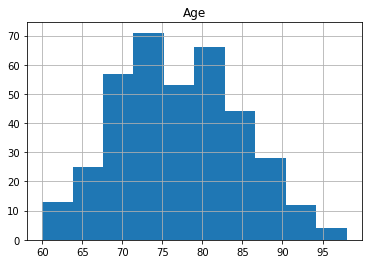

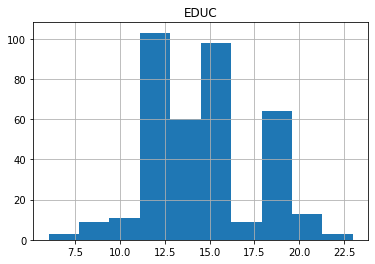

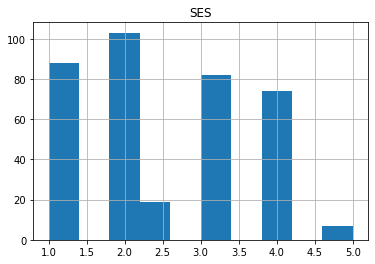

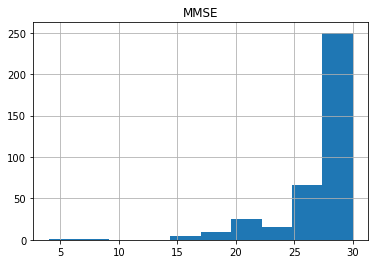

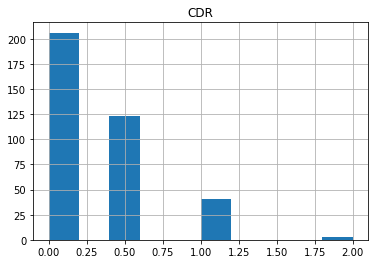

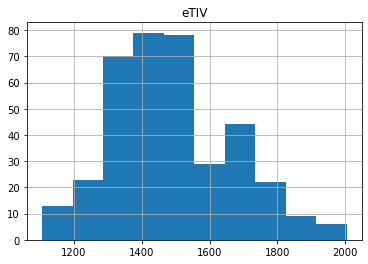

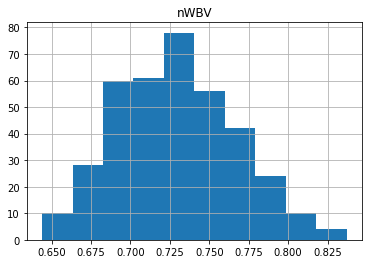

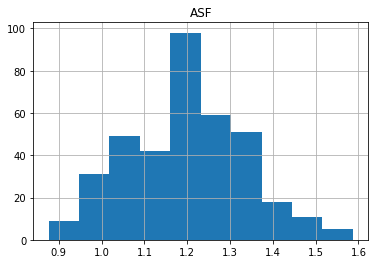

In [19]:
for cv in continuous_vars:
    dementia[cv].hist()
    plt.title(cv)
    plt.show()

## Examine all Columns for Normality 
### Multiple Histograms with Seaborn (across the diagonal)
### Scatterplots

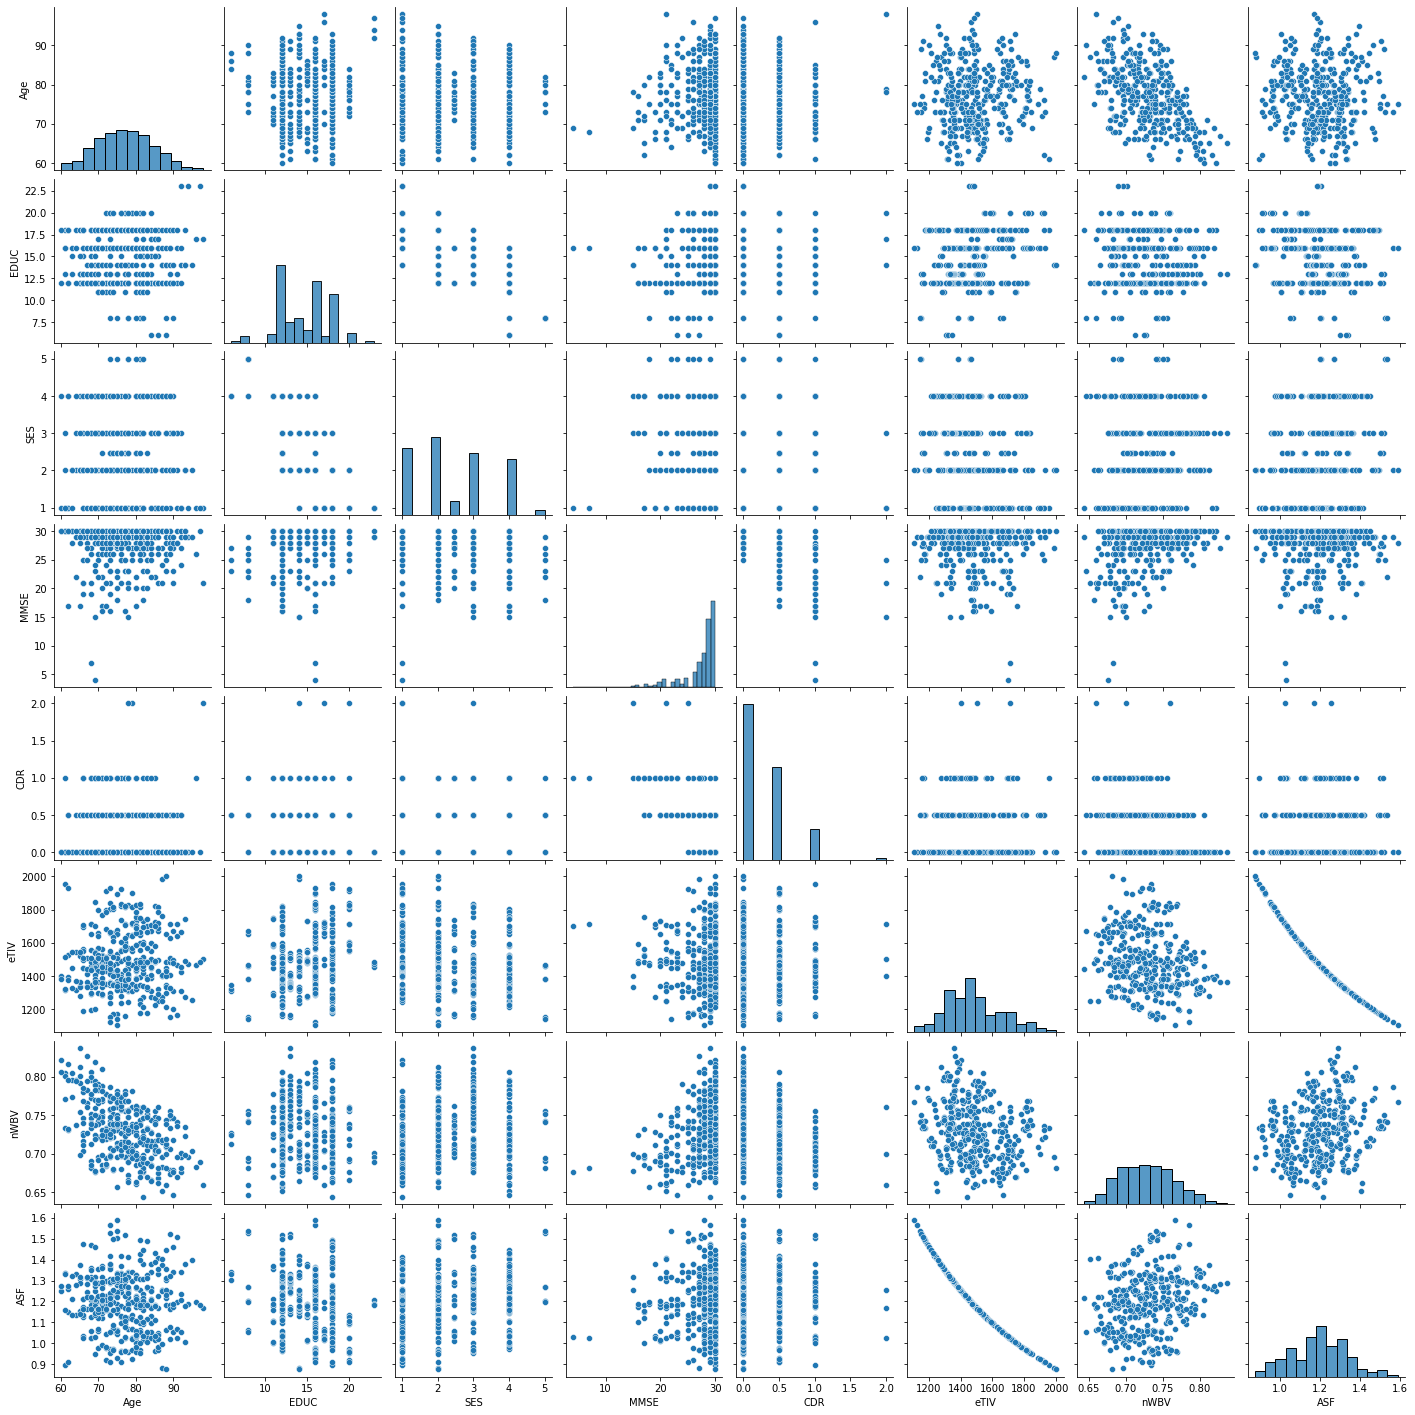

In [20]:
sns.pairplot(dementia[continuous_vars])

In [21]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Status  373 non-null    int64  
 1   Gender  373 non-null    int64  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 29.3 KB


In [22]:
#Explore the relationship between each feature of MRI tests and dementia of the patient. 
#The reason we conducted this Exploratory Data Analysis process is to state the relationship 
#of data explicitly through a graph so that we could assume the correlations before data 
#extraction or data analysis. It might help us to understand the nature of the data and 
#to select the appropriate analysis method for the model later.

#The minimum, maximum, and average values of each feature for graph implementation are as follows.

In [23]:
dementia.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('PuBuGn_r'), axis=1)

,Status,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Status,1.0,-0.22,-0.0059,-0.19,0.061,-0.52,0.78,-0.043,-0.31,0.032
Gender,-0.22,1.0,0.038,-0.089,0.045,0.17,-0.2,-0.57,0.25,0.56
Age,-0.0059,0.038,1.0,-0.028,-0.047,0.056,-0.026,0.042,-0.52,-0.035
EDUC,-0.19,-0.089,-0.028,1.0,-0.71,0.19,-0.15,0.26,-0.012,-0.24
SES,0.061,0.045,-0.047,-0.71,1.0,-0.15,0.073,-0.25,0.089,0.25
MMSE,-0.52,0.17,0.056,0.19,-0.15,1.0,-0.68,-0.032,0.34,0.039
CDR,0.78,-0.2,-0.026,-0.15,0.073,-0.68,1.0,0.023,-0.34,-0.029
eTIV,-0.043,-0.57,0.042,0.26,-0.25,-0.032,0.023,1.0,-0.21,-0.99
nWBV,-0.31,0.25,-0.52,-0.012,0.089,0.34,-0.34,-0.21,1.0,0.21
ASF,0.032,0.56,-0.035,-0.24,0.25,0.039,-0.029,-0.99,0.21,1.0


## Goal: Can you determine Status by combination of other variables?

<AxesSubplot:xlabel='Age', ylabel='MMSE'>

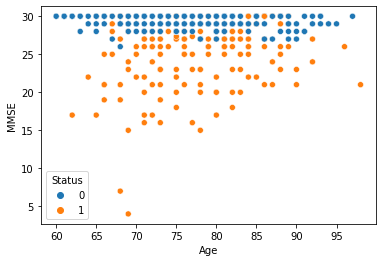

In [24]:
sns.scatterplot(x='Age', y='MMSE', hue='Status', data=dementia)

<AxesSubplot:xlabel='eTIV', ylabel='CDR'>

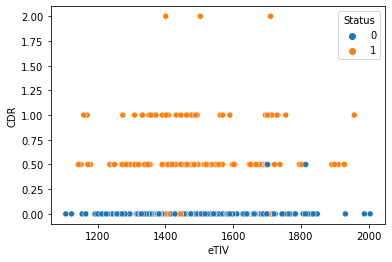

In [25]:
sns.scatterplot(x='eTIV', y='CDR', hue='Status', data=dementia)

<AxesSubplot:xlabel='EDUC', ylabel='SES'>

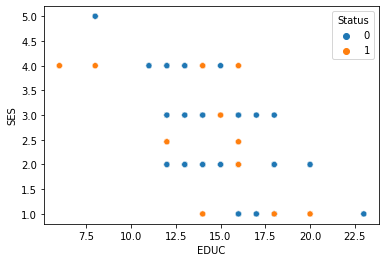

In [26]:
sns.scatterplot(x='EDUC', y='SES', hue='Status', data=dementia)

In [27]:
dementia.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

<AxesSubplot:xlabel='eTIV', ylabel='nWBV'>

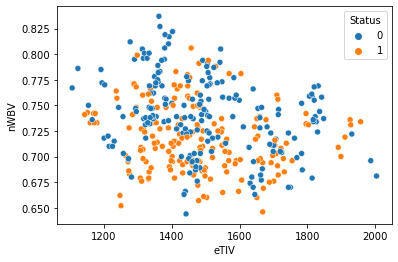

In [28]:
sns.scatterplot(x='eTIV', y='nWBV', hue='Status', data=dementia)

<AxesSubplot:xlabel='nWBV', ylabel='MMSE'>

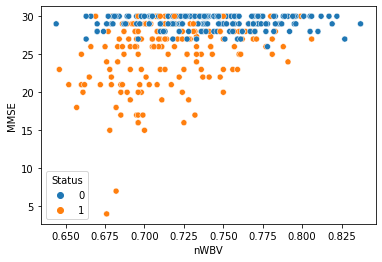

In [29]:
sns.scatterplot(x='nWBV', y='MMSE', hue='Status', data=dementia)

### Heat map to determine how well variables correlate with each other

<AxesSubplot:>

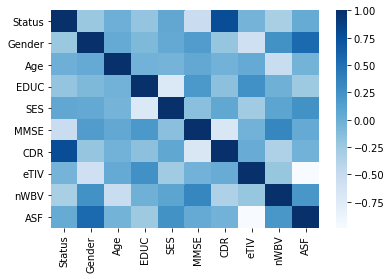

In [30]:
sns.heatmap(dementia.corr(), cmap='Blues')

# Just another way to plot histograms of continuous variables +  Normal Distribution. 
#### Pandas has a function .hist() for data normalization visualization (ignores missing values). For a fitted curve, we use seaborn, using displot() function on each variabe.

## Age

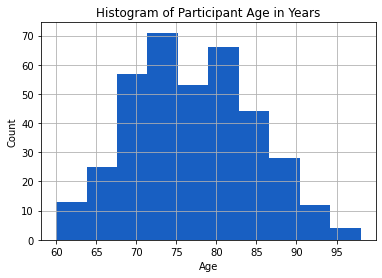

In [31]:
dementia.Age.hist()
num_bins = 10
n, bins, patches = plt.hist(dementia['Age'], num_bins,  facecolor='blue', alpha=.2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Participant Age in Years')
plt.show()

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

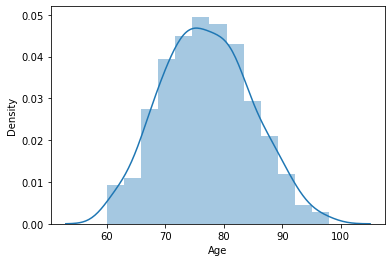

In [32]:
sns.distplot(dementia['Age'])

## Years of Education

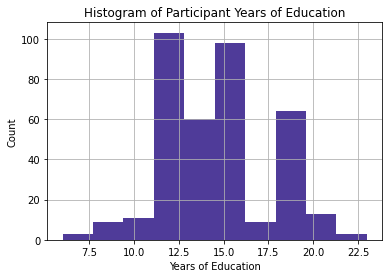

In [33]:
dementia.EDUC.hist()
num_bins = 10
n, bins, patches = plt.hist(dementia['EDUC'], num_bins,  facecolor='purple', alpha=.5)
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.title('Histogram of Participant Years of Education')
plt.show()

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EDUC', ylabel='Density'>

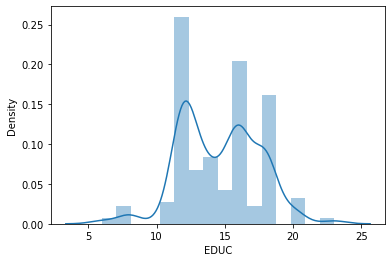

In [34]:
sns.distplot(dementia['EDUC'])

## Socioeconomic Status

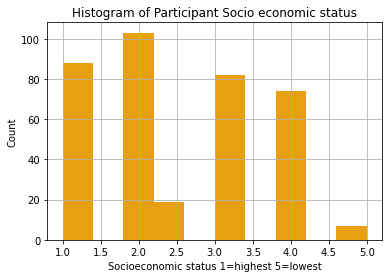

In [35]:
dementia.SES.hist()
num_bins = 10
n, bins, patches = plt.hist(dementia['SES'], num_bins,  facecolor='orange', alpha=.9)
plt.xlabel('Socioeconomic status 1=highest 5=lowest')
plt.ylabel('Count')
plt.title('Histogram of Participant Socio economic status')
plt.show()

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SES', ylabel='Density'>

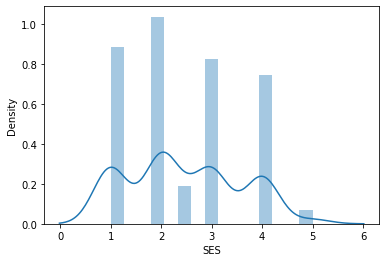

In [36]:
sns.distplot(dementia['SES'])

## Gender

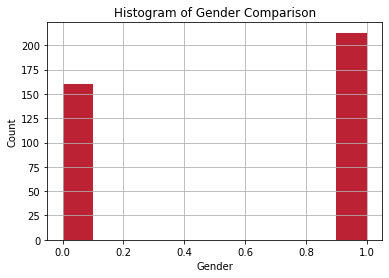

In [37]:
dementia.Gender.hist()
num_bins = 10
n, bins, patches = plt.hist(dementia['Gender'], num_bins,  facecolor='red', alpha=.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Histogram of Gender Comparison')
plt.show()

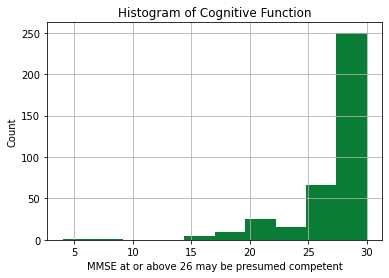

In [38]:
dementia.MMSE.hist()
num_bins = 10
n, bins, patches = plt.hist(dementia['MMSE'], num_bins,  facecolor='green', alpha=.7)
plt.xlabel('MMSE at or above 26 may be presumed competent')
plt.ylabel('Count')
plt.title('Histogram of Cognitive Function')
plt.show()

## Mini Mental State Exam

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MMSE', ylabel='Density'>

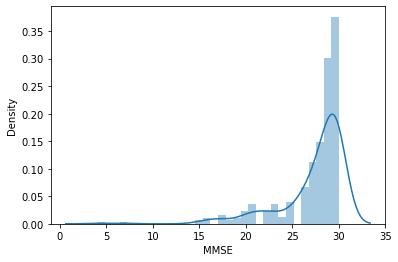

In [39]:
sns.distplot(dementia['MMSE'])

#### In the histogram above the bulk of the data is on the right which means it is negatively skewed (mean is less than the mode and median.) 

# Transforming Negatively Skewed Data

#### ---Squaring the Variable

In [40]:
dementia['MMSESQ'] = dementia['MMSE']**2

<AxesSubplot:>

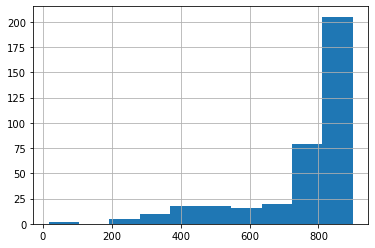

In [41]:
dementia.MMSESQ.hist()

#histogram still does n ot look normal,so let's cube it.
#### Cubing the Variable

In [42]:
dementia['MMSECUBE'] = dementia['MMSE']**3

In [43]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Status    373 non-null    int64  
 1   Gender    373 non-null    int64  
 2   Age       373 non-null    int64  
 3   EDUC      373 non-null    int64  
 4   SES       373 non-null    float64
 5   MMSE      373 non-null    float64
 6   CDR       373 non-null    float64
 7   eTIV      373 non-null    int64  
 8   nWBV      373 non-null    float64
 9   ASF       373 non-null    float64
 10  MMSESQ    373 non-null    float64
 11  MMSECUBE  373 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 35.1 KB


<AxesSubplot:>

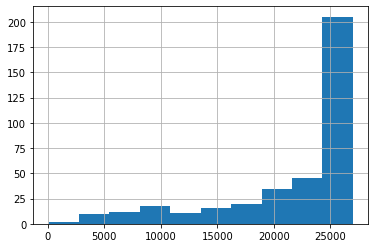

In [44]:
dementia.MMSECUBE.hist()

In [45]:
dementia.head()

,Status,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSESQ,MMSECUBE
0,1,0,79,20,1.0,25.0,2.0,1710,0.760,1.026,625.0,15625.0
1,1,1,98,17,1.0,21.0,2.0,1503,0.660,1.168,441.0,9261.0
2,1,1,78,14,3.0,15.0,2.0,1401,0.700,1.253,225.0,3375.0
3,1,0,77,20,1.0,23.0,1.0,1713,0.756,1.024,529.0,12167.0
4,1,0,61,18,1.0,30.0,1.0,1957,0.734,0.897,900.0,27000.0


## Clinical Dementia Rating

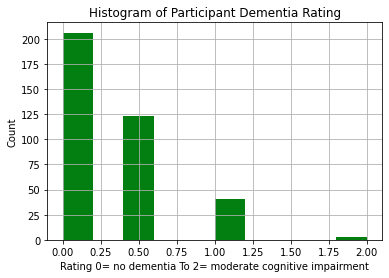

In [46]:
dementia.CDR.hist()
num_bins = 10
n, bins, patches = plt.hist(dementia['CDR'], num_bins,  facecolor='green', alpha=.9)
plt.xlabel('Rating 0= no dementia To 2= moderate cognitive impairment') 
plt.ylabel('Count')
plt.title('Histogram of Participant Dementia Rating')
plt.show()

#### In the histogram above, the bulk of the data is on the left. This means it is POSITIVELY SKEWED (mean is > than the mode and median.)

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CDR', ylabel='Density'>

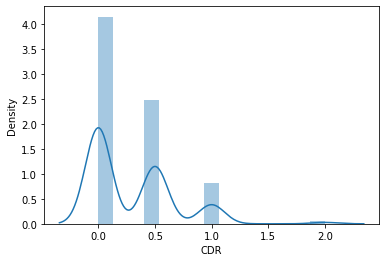

In [47]:
sns.distplot(dementia['CDR'])

## Normalize Whole Brain Volume

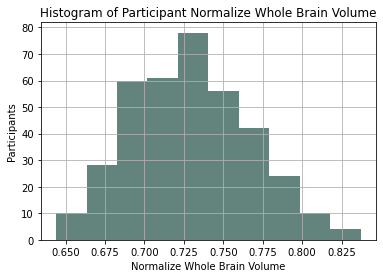

In [48]:
dementia.nWBV.hist()
num_bins = 10
n, bins, patches = plt.hist(dementia['nWBV'], num_bins, facecolor='orange', alpha=.3)
plt.xlabel('Normalize Whole Brain Volume')
plt.ylabel('Participants')
plt.title('Histogram of Participant Normalize Whole Brain Volume')
plt.show()

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nWBV', ylabel='Density'>

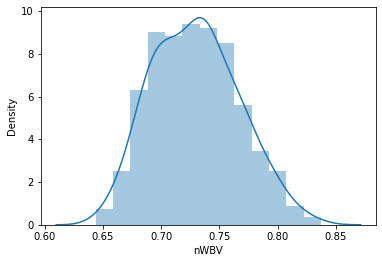

In [49]:
sns.distplot(dementia['nWBV'])

## Estimated Total Intracraninal Volume

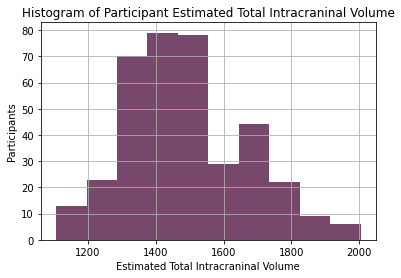

In [50]:
dementia.eTIV.hist()
num_bins = 10
n, bins, patches = plt.hist(dementia['eTIV'], num_bins,  facecolor='red', alpha=.4)
plt.xlabel('Estimated Total Intracraninal Volume')
plt.ylabel('Participants')
plt.title('Histogram of Participant Estimated Total Intracraninal Volume')
plt.show()

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eTIV', ylabel='Density'>

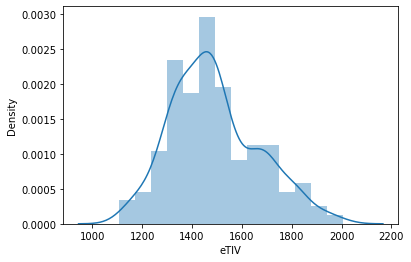

In [51]:
sns.distplot(dementia['eTIV'])

## Atlas Scaling Factor

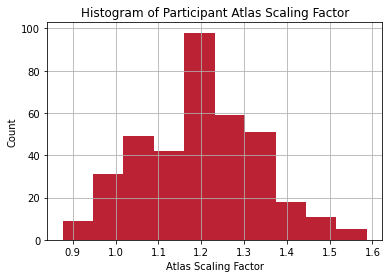

In [52]:
dementia.ASF.hist()
num_bins = 10
n, bins, patches = plt.hist(dementia['ASF'], num_bins,  facecolor='red', alpha=.7)
plt.xlabel('Atlas Scaling Factor')
plt.ylabel('Count')
plt.title('Histogram of Participant Atlas Scaling Factor')
plt.show()

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ASF', ylabel='Density'>

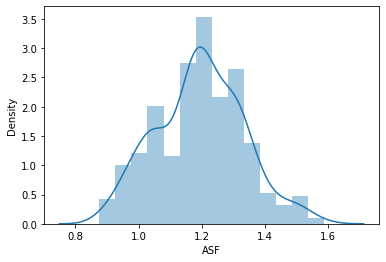

In [53]:
sns.distplot(dementia['ASF'])

## Bar Charts- Adding Labels and Title 

Text(0, 0.5, 'Count')

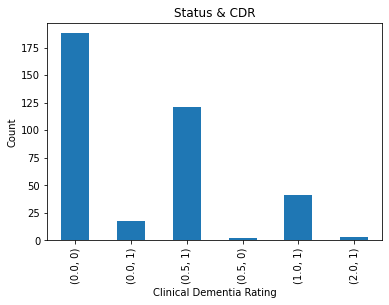

In [54]:
Status_CDR = dementia.groupby('CDR')['Status'].value_counts().plot(kind = 'bar')
Status_CDR.set_title("Status & CDR")
Status_CDR.set_xlabel("Clinical Dementia Rating")
Status_CDR.set_ylabel("Count")

Text(0, 0.5, 'Status')

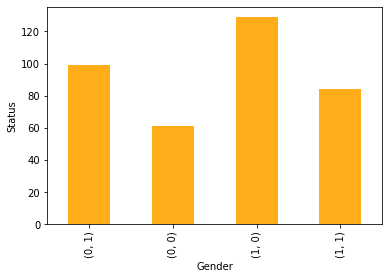

In [55]:
Gender_stat =dementia.groupby('Gender')['Status'].value_counts().plot(kind ='bar', facecolor='orange', alpha=.9)
Gender_stat.set_xlabel("Gender")
Gender_stat.set_ylabel("Status")
# 0 = male  1= female

Text(0, 0.5, 'Years of Education')

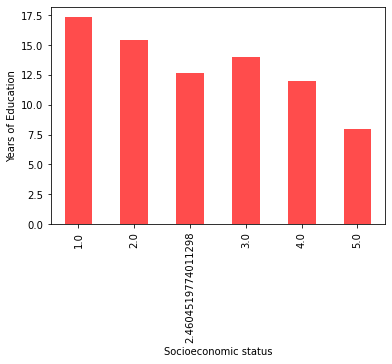

In [56]:
SES_EDUC =dementia.groupby('SES')['EDUC'].mean().plot(kind ='bar', facecolor='red', alpha=.7)
SES_EDUC.set_xlabel("Socioeconomic status")
SES_EDUC.set_ylabel("Years of Education")

## Scatter Plots (pandas) represents two quantitative variables and their interaction 

In [57]:
dementia.info

<bound method DataFrame.info of      Status  Gender  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  MMSESQ  \
0         1       0   79    20  1.0  25.0  2.0  1710  0.760  1.026   625.0   
1         1       1   98    17  1.0  21.0  2.0  1503  0.660  1.168   441.0   
2         1       1   78    14  3.0  15.0  2.0  1401  0.700  1.253   225.0   
3         1       0   77    20  1.0  23.0  1.0  1713  0.756  1.024   529.0   
4         1       0   61    18  1.0  30.0  1.0  1957  0.734  0.897   900.0   
..      ...     ...  ...   ...  ...   ...  ...   ...    ...    ...     ...   
368       0       0   81    11  4.0  28.0  0.0  1750  0.670  1.003   784.0   
369       0       1   82    11  4.0  30.0  0.0  1590  0.760  1.104   900.0   
370       0       0   83    11  4.0  29.0  0.0  1744  0.670  1.006   841.0   
371       0       1   78     8  5.0  29.0  0.0  1383  0.756  1.269   841.0   
372       0       1   80     8  5.0  27.0  0.0  1381  0.751  1.270   729.0   

     MMSECUBE  
0     15625.0  

Text(0, 0.5, 'Normalize Whole Brain Volume')

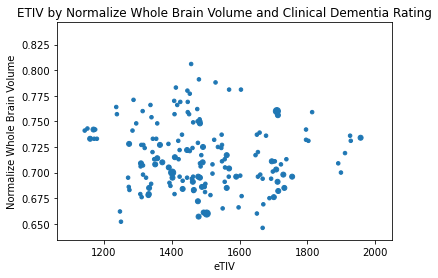

In [58]:
ScatterPlot = dementia.plot.scatter(x = 'eTIV', y= 'nWBV', s= dementia['CDR']*25)
ScatterPlot.set_title("ETIV by Normalize Whole Brain Volume and Clinical Dementia Rating")
ScatterPlot.set_xlabel("eTIV")
ScatterPlot.set_ylabel("Normalize Whole Brain Volume")

In [59]:
dementia.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Status,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSESQ,MMSECUBE
Status,1.0,-0.22,-0.0059,-0.19,0.061,-0.52,0.78,-0.043,-0.31,0.032,-0.56,-0.58
Gender,-0.22,1.0,0.038,-0.089,0.045,0.17,-0.2,-0.57,0.25,0.56,0.17,0.17
Age,-0.0059,0.038,1.0,-0.028,-0.047,0.056,-0.026,0.042,-0.52,-0.035,0.034,0.018
EDUC,-0.19,-0.089,-0.028,1.0,-0.71,0.19,-0.15,0.26,-0.012,-0.24,0.22,0.23
SES,0.061,0.045,-0.047,-0.71,1.0,-0.15,0.073,-0.25,0.089,0.25,-0.17,-0.18
MMSE,-0.52,0.17,0.056,0.19,-0.15,1.0,-0.68,-0.032,0.34,0.039,0.99,0.97
CDR,0.78,-0.2,-0.026,-0.15,0.073,-0.68,1.0,0.023,-0.34,-0.029,-0.7,-0.71
eTIV,-0.043,-0.57,0.042,0.26,-0.25,-0.032,0.023,1.0,-0.21,-0.99,-0.015,-0.0026
nWBV,-0.31,0.25,-0.52,-0.012,0.089,0.34,-0.34,-0.21,1.0,0.21,0.35,0.34
ASF,0.032,0.56,-0.035,-0.24,0.25,0.039,-0.029,-0.99,0.21,1.0,0.022,0.0095


### Exploring Structure of Variables

In [60]:
d2 = dementia[dementia['CDR'] < 1.0]

In [61]:
d2.shape

(329, 12)

#### 329 rows and 12 columns

In [62]:
dementia['CDR'].value_counts()

0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64

level of impairment/dementia

206 normal
123 very mild dementia
41 mild dementia
3 moderate dementia

In [63]:
d3 = dementia[dementia['Gender'] == '0']

In [64]:
d3.shape

(0, 12)

In [65]:
dementia['Gender'].value_counts()

1    213
0    160
Name: Gender, dtype: int64

213 Male
160 Female

# Data Wrangling

# Single t-test 
examines whether a particular value is different than the population mean. 

#### Goal: to determine whether the AGE for a demented person, 75, is different than the population mean.

### Testing Assumptions
the single sample t test is normally distributed

<AxesSubplot:>

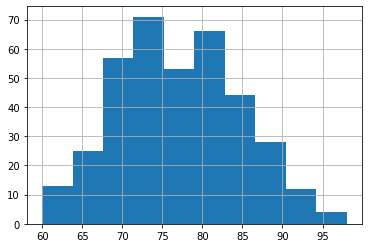

In [66]:
dementia['Age'].hist()

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

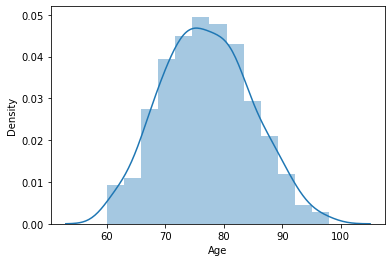

In [67]:
sns.distplot(dementia['Age'])

## Run Analysis

In [68]:
stats.ttest_1samp(dementia['Age'], 75)

Ttest_1sampResult(statistic=5.089062077130826, pvalue=5.723049766221478e-07)

### The statistic is the t-value that measure the size of the difference relative to the variation in your sample data.

### CONCLUSION: This test is significant p < .05 The age for a demented person is different than the population mean, see below.  Higher or lower? we need to examine the population mean.

In [69]:
dementia.Age.mean()

77.01340482573727

### It turns out that the average age of a demented person in this sample was 77. 

# Independent t-test
use to determine whether the means of two different, unrelated groups are the same or different. 
#### Goal: to determine whether demented or non demented person differ in their average Clinical Dementia Rating (CDR).

#### The Clinical Dementia Rating (CDR) scale is a 0–3 point numeric scale derived from clinician rating of cognition and daily function in the domains of memory, orientation, judgment and problem solving, community affairs, home and hobbies, and personal care (Morris, 1993).

### Test Assumptions 
independent t has normality. Test normality for each group demented and nondemented

In [70]:
dementia.head()

,Status,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSESQ,MMSECUBE
0,1,0,79,20,1.0,25.0,2.0,1710,0.760,1.026,625.0,15625.0
1,1,1,98,17,1.0,21.0,2.0,1503,0.660,1.168,441.0,9261.0
2,1,1,78,14,3.0,15.0,2.0,1401,0.700,1.253,225.0,3375.0
3,1,0,77,20,1.0,23.0,1.0,1713,0.756,1.024,529.0,12167.0
4,1,0,61,18,1.0,30.0,1.0,1957,0.734,0.897,900.0,27000.0


In [79]:
dementia['CDR'][dementia['Status']== 1].unique()

array([2. , 1. , 0.5, 0. ])

<AxesSubplot:>

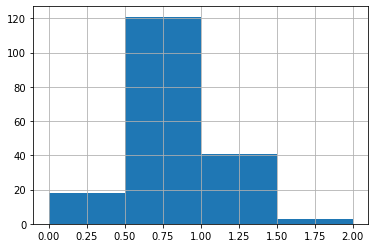

In [85]:
dementia['CDR'][dementia['Status']== 1].hist(bins=4)

<AxesSubplot:>

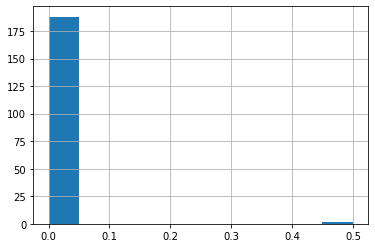

In [86]:
dementia['CDR'][dementia['Status']==0].hist()

### Conclusion: neither are normally distributed

### Run Analysis


In [94]:
ttest_ind(dementia['EDUC'][dementia['Status']== 0], dementia['EDUC'][dementia['Status']== 1])

Ttest_indResult(statistic=3.7898997847803932, pvalue=0.0001758168534161196)

### There is a significant difference between these two groups because p < .05
### Now let's take a look at the means to determine what group has a higher or lower Clinical Dementia Rating (CDR)

In [97]:
#NonDemented
dementia['CDR'][dementia['Status']== 0].mean()

0.005263157894736842

In [98]:
#Demented
dementia['CDR'][dementia['Status']== 1].mean()

0.587431693989071

### Conclusion: The Demented group had a significantly higher Clinical Dementia Rating than Nondemented group.

# Independent Chi-Square
use when you want to determine whether two categorical variables influence each other.
### Goal: to determine if Gender is dependent on Status (demented/nondemented)

## Create a Contingency Table

In [99]:
dementia_crosstab = pd.crosstab(dementia['Status'], dementia['Gender'])

In [100]:
dementia_crosstab

Gender,0,1
Status,,
0,61,129
1,99,84


#{"Gender": {"M": 0, "F": 1}}
#{"Status": {"NonDemented": 0, "Demented": 1,}}
### Result:  99 demented females, 84 demented males; 129 nondemented females, 61 nondemented males

# See how variables relate to each other in the dementia dataset using correlation

In [101]:
dementia.head()

,Status,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSESQ,MMSECUBE
0,1,0,79,20,1.0,25.0,2.0,1710,0.760,1.026,625.0,15625.0
1,1,1,98,17,1.0,21.0,2.0,1503,0.660,1.168,441.0,9261.0
2,1,1,78,14,3.0,15.0,2.0,1401,0.700,1.253,225.0,3375.0
3,1,0,77,20,1.0,23.0,1.0,1713,0.756,1.024,529.0,12167.0
4,1,0,61,18,1.0,30.0,1.0,1957,0.734,0.897,900.0,27000.0


### how does education and ses correlate?

In [102]:
dementia['EDUC'].corr(dementia['SES'])

-0.7086797891859624

### Conclusion: Moderately strong negative correlation
### This means as years of education go up, the socioeconomic status is higher 1= highest  5= lowest

## Make .corr() pretty

In [103]:
dementia.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Status,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSESQ,MMSECUBE
Status,1.0,-0.22,-0.0059,-0.19,0.061,-0.52,0.78,-0.043,-0.31,0.032,-0.56,-0.58
Gender,-0.22,1.0,0.038,-0.089,0.045,0.17,-0.2,-0.57,0.25,0.56,0.17,0.17
Age,-0.0059,0.038,1.0,-0.028,-0.047,0.056,-0.026,0.042,-0.52,-0.035,0.034,0.018
EDUC,-0.19,-0.089,-0.028,1.0,-0.71,0.19,-0.15,0.26,-0.012,-0.24,0.22,0.23
SES,0.061,0.045,-0.047,-0.71,1.0,-0.15,0.073,-0.25,0.089,0.25,-0.17,-0.18
MMSE,-0.52,0.17,0.056,0.19,-0.15,1.0,-0.68,-0.032,0.34,0.039,0.99,0.97
CDR,0.78,-0.2,-0.026,-0.15,0.073,-0.68,1.0,0.023,-0.34,-0.029,-0.7,-0.71
eTIV,-0.043,-0.57,0.042,0.26,-0.25,-0.032,0.023,1.0,-0.21,-0.99,-0.015,-0.0026
nWBV,-0.31,0.25,-0.52,-0.012,0.089,0.34,-0.34,-0.21,1.0,0.21,0.35,0.34
ASF,0.032,0.56,-0.035,-0.24,0.25,0.039,-0.029,-0.99,0.21,1.0,0.022,0.0095


## Heat map

<AxesSubplot:>

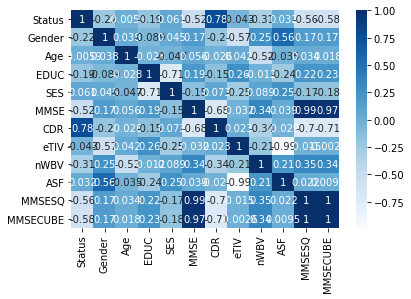

In [104]:
sns.heatmap(dementia.corr(),annot=True, cmap='Blues')

# Logistic Regression Model
single continuous IV predicting a single continuous DV

#make each variable a dataframe

In [105]:
x = dementia['Age']
y = dementia['eTIV']

### Run the Analysis

In [106]:
model = sm.OLS(y,x).fit()

In [107]:
pred_val = model.fittedvalues.copy()
true_val = dementia['eTIV'].values.copy()
residual = true_val - pred_val

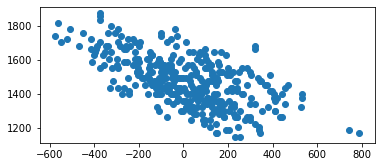

In [108]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [109]:
sms.diagnostic.het_breuschpagan(residual, dementia[['Age']])

(120.3860198336195, nan, 177.2807639094653, 2.392047447261992e-33)

### 114.2 is the f value to test for homoscedasticity. 

## Harvey Collier model

In [110]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-1.706560231411962, pvalue=0.08874515393647509)

In [111]:
transformed, _ = boxcox(dementia['Age'])

(array([13., 19., 45., 55., 66., 70., 51., 33., 16.,  5.]),
 array([ 9.47930766,  9.71914201,  9.95897636, 10.19881071, 10.43864507,
        10.67847942, 10.91831377, 11.15814812, 11.39798247, 11.63781682,
        11.87765117]),
 <BarContainer object of 10 artists>)

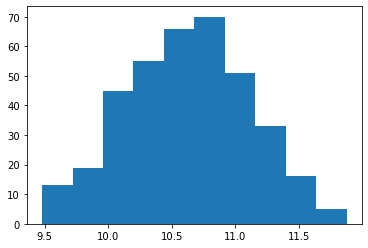

In [112]:
plt.hist(transformed)


### This is a normal distribution with a beautiful bell curve

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   eTIV   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          1.624e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                   5.79e-309
Time:                        20:35:22   Log-Likelihood:                         -2548.3
No. Observations:                 373   AIC:                                      5099.
Df Residuals:                     372   BIC:                                      5102.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           19.1446      0.150    127.421      0.000      18.849      19.440
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.370
Skew:                           0.050   Prob(JB):                        0.831
Kurtosis:                       3.118   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
x.head()

0    79
1    98
2    78
3    77
4    61
Name: Age, dtype: int64

In [115]:
X= dementia.drop(columns=['Status'], axis=1)
y= dementia['Status']

# Machine Learning

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Goal is to accurately predict dementia status.

In [117]:
dementia.head()

,Status,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSESQ,MMSECUBE
0,1,0,79,20,1.0,25.0,2.0,1710,0.760,1.026,625.0,15625.0
1,1,1,98,17,1.0,21.0,2.0,1503,0.660,1.168,441.0,9261.0
2,1,1,78,14,3.0,15.0,2.0,1401,0.700,1.253,225.0,3375.0
3,1,0,77,20,1.0,23.0,1.0,1713,0.756,1.024,529.0,12167.0
4,1,0,61,18,1.0,30.0,1.0,1957,0.734,0.897,900.0,27000.0


### Data Wrangling

In [118]:
dementia.isnull().sum()

Status      0
Gender      0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
MMSESQ      0
MMSECUBE    0
dtype: int64

### X & Y

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    373 non-null    int64  
 1   Age       373 non-null    int64  
 2   EDUC      373 non-null    int64  
 3   SES       373 non-null    float64
 4   MMSE      373 non-null    float64
 5   CDR       373 non-null    float64
 6   eTIV      373 non-null    int64  
 7   nWBV      373 non-null    float64
 8   ASF       373 non-null    float64
 9   MMSESQ    373 non-null    float64
 10  MMSECUBE  373 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 32.2 KB


In [120]:
y.value_counts()

0    190
1    183
Name: Status, dtype: int64

### to kick off machine learning, create  x and y variables as their own arrays.

In [121]:
X= dementia[[ 'Gender', 'Age', 'EDUC', 'SES', 'MMSE','CDR', 'eTIV', 'nWBV', 'ASF']]
y= dementia['Status']

In [122]:
X= dementia.drop(columns=['Status'])
y= dementia['Status']

## Train Test Split 

In [123]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
#### to see the shape of the data for machine learning algorithm print the following

In [135]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(261, 11) (261,)
(112, 11) (112,)


#### This shows that in the x_train dataset, there are 261 rows and 11columns
and in the x_test dataset, there are 112 rows and 11 columns.

In [136]:
dementia.columns

Index(['Status', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF', 'MMSESQ', 'MMSECUBE'],
      dtype='object')

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X= dementia[[ 'Gender', 'Age', 'EDUC', 'SES', 'MMSE','CDR', 'eTIV', 'nWBV', 'ASF']]
y= dementia['Status']

lm = LogisticRegression()
cross_val_score(lm, X_train, y_train)
#lm.fit(lm, X_train, y_train)

C:\Users\Evelyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Evelyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.79245283, 0.82692308, 0.75      , 0.73076923, 0.88461538])

### Examining the predictions


In [128]:
lm.fit(X_train, y_train)

C:\Users\Evelyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
predictions = lm.predict(X_test)
predictions

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0], dtype=int64)

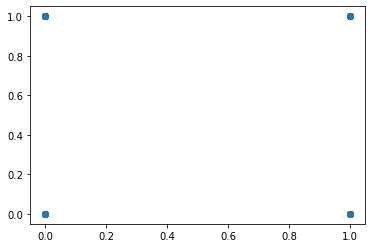

In [130]:
plt.scatter(y_test, predictions)

### Accuracy Score

In [131]:
print("Score:", lm.score(X_test, y_test))

Score: 0.8125


#### Model is accurate approx 81% of the time.

### Mean Absolute Error (MAE) - average amount of error between the prediction and the real data.

In [137]:
metrics.mean_absolute_error(y_test, predictions)

0.1875

### Mean Squared Error (MSE)- the squre of the absolute error from MAE

In [138]:
metrics.mean_squared_error(y_test, predictions)

0.1875

### Root Mean Squared Error (RMSE) - most popular

In [133]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.4330127018922193

#### Very close to zero!

### Confusion Matrix

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[46,  9],
       [12, 45]], dtype=int64)